In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets

In [4]:
dataset = datasets.load_iris(as_frame=True)['frame']
dataset.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [5]:
dataset.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [6]:
features = [
    'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
    'petal width (cm)'
]
X = dataset[features]

In [7]:
values = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    values.append(kmeans.inertia_)


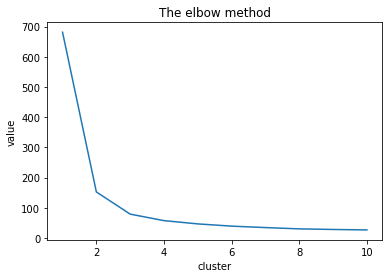

In [8]:
plt.plot(range(1, 11), values)
plt.title('The elbow method')
plt.xlabel('cluster')
plt.ylabel('value')  # within cluster sum of squares
plt.show()

In [9]:
optimal_clusters = 3

In [12]:
model = KMeans(n_clusters=3, init='k-means++',
               max_iter=300, n_init=10, random_state=0)
predictions = model.fit_predict(X)

In [17]:
print(X[predictions == 0])

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
52                 6.9               3.1                4.9               1.5
77                 6.7               3.0                5.0               1.7
100                6.3               3.3                6.0               2.5
102                7.1               3.0                5.9               2.1
103                6.3               2.9                5.6               1.8
104                6.5               3.0                5.8               2.2
105                7.6               3.0                6.6               2.1
107                7.3               2.9                6.3               1.8
108                6.7               2.5                5.8               1.8
109                7.2               3.6                6.1               2.5
110                6.5               3.2                5.1               2.0
111                6.4               2.7                5.3     

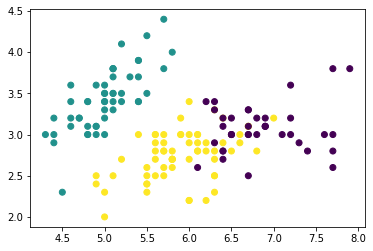

In [20]:
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=predictions)